In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# Importing the data

In [104]:
data=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [105]:
data.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

                     geolocation_source  wepp_id year_of_capacity_data  \
0  National Renewable Energy Laboratory      NaN                   NaN   
1                                   WRI      NaN                   NaN   
2                                   WRI      NaN                   NaN   
3                                   WRI      NaN                2018.0   
4                                   WRI      NaN                2018.0   

  generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3          631.777928          617.789264             843.747   
4         1668.290000         3035.550000            5916.370   

   generation_gwh_2016  generation_gwh_2017         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           886.004428           663.774500  Central Electricity Authority   
4          6243.000000          5385.579736  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 25 columns]

# Ckecking the missing values

In [106]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [107]:
data.shape

(908, 25)

# Droping the unwanted columns

In [108]:
data.drop(columns=['estimated_generation_gwh','other_fuel3','other_fuel2','other_fuel1','wepp_id','country','url','country_long','gppd_idnr'],inplace=True)

In [109]:
data.head()

name  capacity_mw  latitude  longitude primary_fuel  \
0          ACME Solar Tower          2.5   28.1839    73.2407        Solar   
1       ADITYA CEMENT WORKS         98.0   24.7663    74.6090         Coal   
2  AES Saurashtra Windfarms         39.2   21.9038    69.3732         Wind   
3               AGARTALA GT        135.0   23.8712    91.3602          Gas   
4              AKALTARA TPP       1800.0   21.9603    82.4091         Coal   

   commissioning_year                 owner  \
0              2011.0           Solar Paces   
1                 NaN  Ultratech Cement ltd   
2                 NaN                   AES   
3              2004.0                   NaN   
4              2015.0                   NaN   

                                 source                    geolocation_source  \
0  National Renewable Energy Laboratory  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd                                   WRI   
2                                   CDM                                   WRI   
3         Central Electricity Authority                                   WRI   
4         Central Electricity Authority                                   WRI   

   year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3                 2018.0           631.777928           617.789264   
4                 2018.0          1668.290000          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3              843.747           886.004428           663.774500   
4             5916.370          6243.000000          5385.579736   

          generation_data_source  
0                            NaN  
1                            NaN  
2                            NaN  
3  Central Electricity Authority  
4  Central Electricity Authority

In [110]:
data.shape

(908, 16)

In [111]:
x=data.drop(columns=['capacity_mw'])
y=data['capacity_mw']

In [112]:
cat_feat=[i for i in x.columns if x[i].dtype=='O']
cont_feat=[i for i in x.columns if x[i].dtype!='O']

In [113]:
cat_feat_with_miss=[i for i in cat_feat if x[i].isnull().sum()>0]
cont_feat_with_miss=[i for i in cont_feat if x[i].isnull().sum()>0]

In [114]:
cat_feat_with_miss

['owner', 'geolocation_source', 'generation_data_source']

In [115]:
cont_feat_with_miss

['latitude',
 'longitude',
 'commissioning_year',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017']

# Droping constant features

In [116]:
constant_feat=[i for i in  cont_feat if data[i].std()==0]

In [117]:
data.drop(columns=constant_feat,inplace=True)

In [118]:
def Plots(data,col):
    plt.figure(figsize=(16,4))
    plt.subplot(1,3,1)
    sns.distplot(data[col].dropna())
    plt.title('Histogram')
    
    plt.subplot(1,3,2)
    st.probplot(data[col].dropna(),plot=plt)
    plt.title('Probplot')
    
    plt.subplot(1,3,3)
    sns.boxplot(data[col].dropna())
    plt.title('Boxplot')
    plt.show()
        

# Graph showing distribution

In [119]:
cont_feat_with_miss.pop(3)

'year_of_capacity_data'

C:\Users\Reshmi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Reshmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


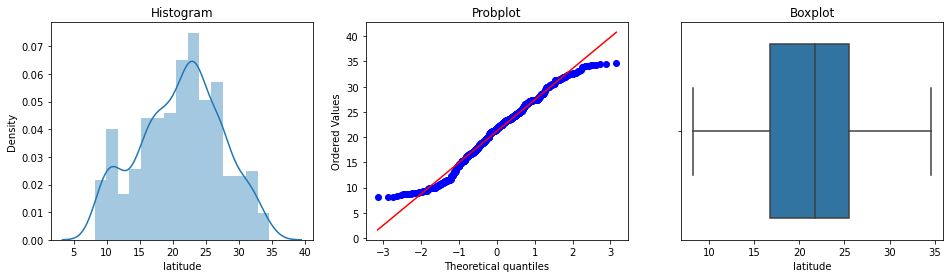

C:\Users\Reshmi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Reshmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


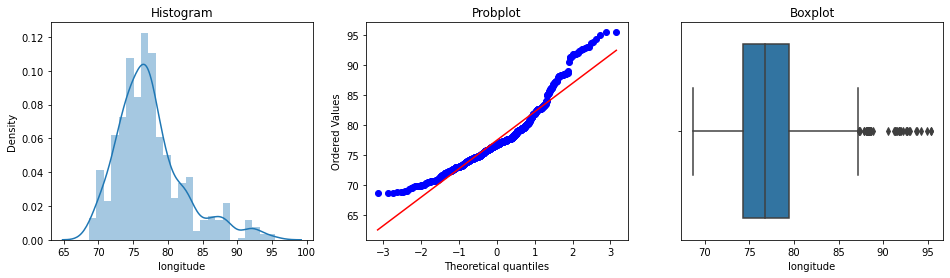

C:\Users\Reshmi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Reshmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


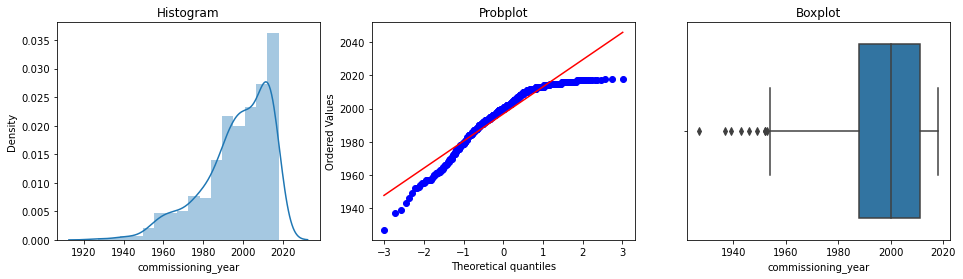

C:\Users\Reshmi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Reshmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


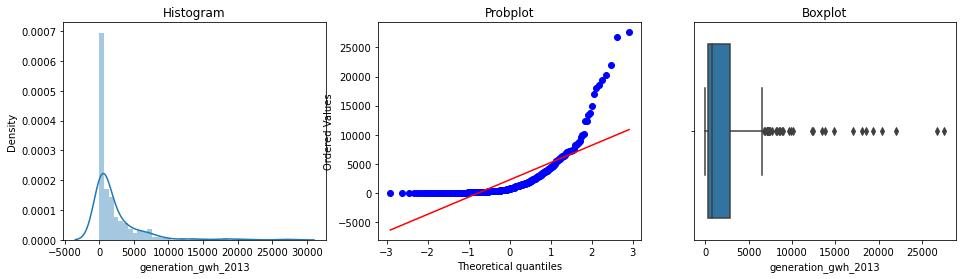

C:\Users\Reshmi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Reshmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


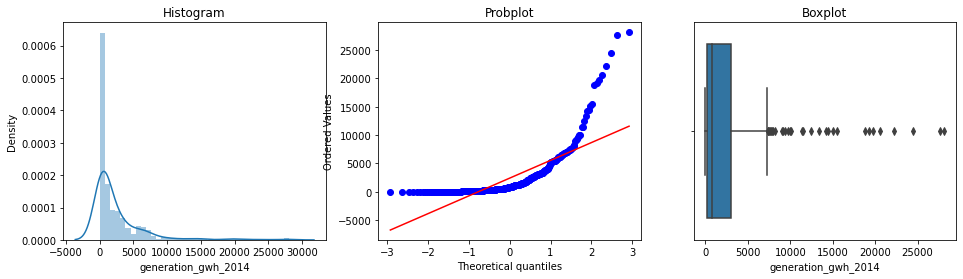

C:\Users\Reshmi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Reshmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


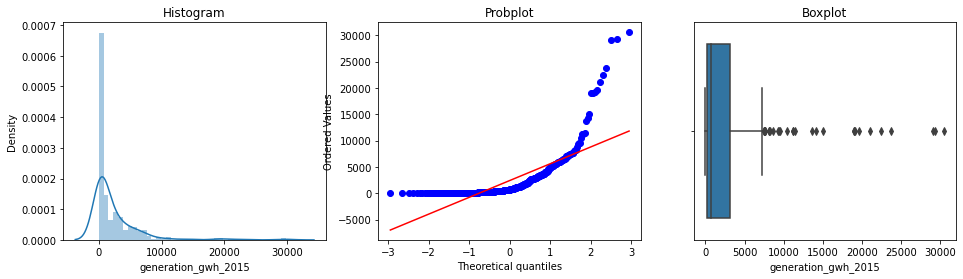

C:\Users\Reshmi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Reshmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


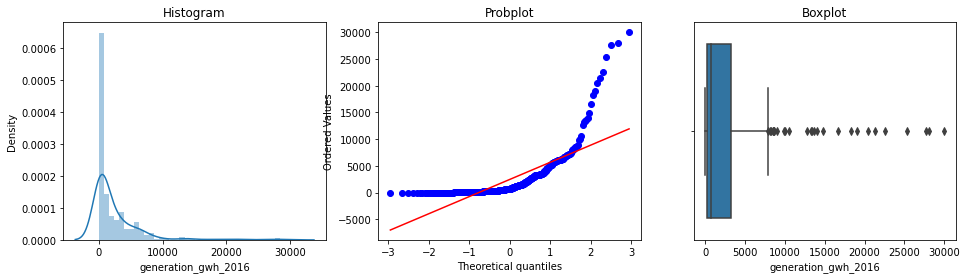

C:\Users\Reshmi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Reshmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


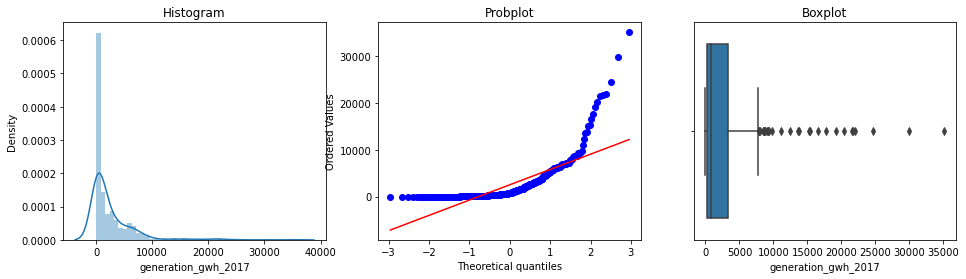

In [120]:
for i in cont_feat_with_miss:
    Plots(data,i)

In [121]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

In [122]:
pipe=Pipeline(steps=[('imputer',SimpleImputer()),('scaler',StandardScaler()),('model',LinearRegression())])

In [123]:
param={'imputer__strategy':['mean','median','mode']}

In [124]:
grid=GridSearchCV(pipe,param_grid=param,scoring='r2')

# Imputingthe missing values with mean value 

In [125]:
grid.fit(data[cont_feat_with_miss],data['capacity_mw'])

C:\Users\Reshmi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Reshmi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Reshmi\anaconda3\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\Reshmi\anaconda3\lib\site-packages\sklearn\pipeline.py", line 292, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Reshmi\anaconda3\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Reshmi\anaconda3\lib\site-packages\sklearn\pipeline.py", line 740, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
 

GridSearchCV(estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('model', LinearRegression())]),
             param_grid={'imputer__strategy': ['mean', 'median', 'mode']},
             scoring='r2')

In [126]:
grid.best_params_

{'imputer__strategy': 'median'}

In [127]:
sm=SimpleImputer(strategy='median')

In [128]:
x[cont_feat_with_miss]=sm.fit_transform(x[cont_feat_with_miss])

In [129]:
x.head()

name  latitude  longitude primary_fuel  \
0          ACME Solar Tower   28.1839    73.2407        Solar   
1       ADITYA CEMENT WORKS   24.7663    74.6090         Coal   
2  AES Saurashtra Windfarms   21.9038    69.3732         Wind   
3               AGARTALA GT   23.8712    91.3602          Gas   
4              AKALTARA TPP   21.9603    82.4091         Coal   

   commissioning_year                 owner  \
0              2011.0           Solar Paces   
1              2000.0  Ultratech Cement ltd   
2              2000.0                   AES   
3              2004.0                   NaN   
4              2015.0                   NaN   

                                 source                    geolocation_source  \
0  National Renewable Energy Laboratory  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd                                   WRI   
2                                   CDM                                   WRI   
3         Central Electricity Authority                                   WRI   
4         Central Electricity Authority                                   WRI   

   year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
0                    NaN           797.063475           805.760000   
1                    NaN           797.063475           805.760000   
2                    NaN           797.063475           805.760000   
3                 2018.0           631.777928           617.789264   
4                 2018.0          1668.290000          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0            701.02725           716.728350           807.601700   
1            701.02725           716.728350           807.601700   
2            701.02725           716.728350           807.601700   
3            843.74700           886.004428           663.774500   
4           5916.37000          6243.000000          5385.579736   

          generation_data_source  
0                            NaN  
1                            NaN  
2                            NaN  
3  Central Electricity Authority  
4  Central Electricity Authority

# Imputing the categorical features with most frequent values

In [130]:
sm=SimpleImputer(strategy='most_frequent')

In [131]:
x[cat_feat]=sm.fit_transform(x[cat_feat])

In [132]:
x.head()

name  latitude  longitude primary_fuel  \
0          ACME Solar Tower   28.1839    73.2407        Solar   
1       ADITYA CEMENT WORKS   24.7663    74.6090         Coal   
2  AES Saurashtra Windfarms   21.9038    69.3732         Wind   
3               AGARTALA GT   23.8712    91.3602          Gas   
4              AKALTARA TPP   21.9603    82.4091         Coal   

   commissioning_year                 owner  \
0              2011.0           Solar Paces   
1              2000.0  Ultratech Cement ltd   
2              2000.0                   AES   
3              2004.0           Acc Acc ltd   
4              2015.0           Acc Acc ltd   

                                 source                    geolocation_source  \
0  National Renewable Energy Laboratory  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd                                   WRI   
2                                   CDM                                   WRI   
3         Central Electricity Authority                                   WRI   
4         Central Electricity Authority                                   WRI   

   year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
0                    NaN           797.063475           805.760000   
1                    NaN           797.063475           805.760000   
2                    NaN           797.063475           805.760000   
3                 2018.0           631.777928           617.789264   
4                 2018.0          1668.290000          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0            701.02725           716.728350           807.601700   
1            701.02725           716.728350           807.601700   
2            701.02725           716.728350           807.601700   
3            843.74700           886.004428           663.774500   
4           5916.37000          6243.000000          5385.579736   

          generation_data_source  
0  Central Electricity Authority  
1  Central Electricity Authority  
2  Central Electricity Authority  
3  Central Electricity Authority  
4  Central Electricity Authority

# Capping the outliers

In [133]:
from feature_engine.outliers import Winsorizer
win=Winsorizer(variables=cont_feat,tail='both')

In [134]:
cont_feat.pop(3)

'year_of_capacity_data'

In [135]:
x.drop(columns=['year_of_capacity_data'],inplace=True)

In [136]:
x.isnull().sum()

name                      0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
geolocation_source        0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

In [137]:
x[cont_feat]=win.fit_transform(x[cont_feat])

In [138]:
x.head()

name  latitude  longitude primary_fuel  \
0          ACME Solar Tower   28.1839    73.2407        Solar   
1       ADITYA CEMENT WORKS   24.7663    74.6090         Coal   
2  AES Saurashtra Windfarms   21.9038    69.3732         Wind   
3               AGARTALA GT   23.8712    91.3602          Gas   
4              AKALTARA TPP   21.9603    82.4091         Coal   

   commissioning_year                 owner  \
0              2011.0           Solar Paces   
1              2000.0  Ultratech Cement ltd   
2              2000.0                   AES   
3              2004.0           Acc Acc ltd   
4              2015.0           Acc Acc ltd   

                                 source                    geolocation_source  \
0  National Renewable Energy Laboratory  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd                                   WRI   
2                                   CDM                                   WRI   
3         Central Electricity Authority                                   WRI   
4         Central Electricity Authority                                   WRI   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0           797.063475           805.760000            701.02725   
1           797.063475           805.760000            701.02725   
2           797.063475           805.760000            701.02725   
3           631.777928           617.789264            843.74700   
4          1668.290000          3035.550000           5916.37000   

   generation_gwh_2016  generation_gwh_2017         generation_data_source  
0           716.728350           807.601700  Central Electricity Authority  
1           716.728350           807.601700  Central Electricity Authority  
2           716.728350           807.601700  Central Electricity Authority  
3           886.004428           663.774500  Central Electricity Authority  
4          6243.000000          5385.579736  Central Electricity Authority

# MeanEncoding the categorical Features

In [139]:
from feature_engine.encoding import MeanEncoder

In [140]:
mm=MeanEncoder(variables=cat_feat)

In [141]:
x['target']=y

In [142]:
x.head()

name  latitude  longitude primary_fuel  \
0          ACME Solar Tower   28.1839    73.2407        Solar   
1       ADITYA CEMENT WORKS   24.7663    74.6090         Coal   
2  AES Saurashtra Windfarms   21.9038    69.3732         Wind   
3               AGARTALA GT   23.8712    91.3602          Gas   
4              AKALTARA TPP   21.9603    82.4091         Coal   

   commissioning_year                 owner  \
0              2011.0           Solar Paces   
1              2000.0  Ultratech Cement ltd   
2              2000.0                   AES   
3              2004.0           Acc Acc ltd   
4              2015.0           Acc Acc ltd   

                                 source                    geolocation_source  \
0  National Renewable Energy Laboratory  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd                                   WRI   
2                                   CDM                                   WRI   
3         Central Electricity Authority                                   WRI   
4         Central Electricity Authority                                   WRI   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0           797.063475           805.760000            701.02725   
1           797.063475           805.760000            701.02725   
2           797.063475           805.760000            701.02725   
3           631.777928           617.789264            843.74700   
4          1668.290000          3035.550000           5916.37000   

   generation_gwh_2016  generation_gwh_2017         generation_data_source  \
0           716.728350           807.601700  Central Electricity Authority   
1           716.728350           807.601700  Central Electricity Authority   
2           716.728350           807.601700  Central Electricity Authority   
3           886.004428           663.774500  Central Electricity Authority   
4          6243.000000          5385.579736  Central Electricity Authority   

   target  
0     2.5  
1    98.0  
2    39.2  
3   135.0  
4  1800.0

In [143]:
x[cat_feat]=mm.fit_transform(x[cat_feat],x['target'])

In [144]:
x.head()

name  latitude  longitude  primary_fuel  commissioning_year       owner  \
0     2.5   28.1839    73.2407     21.712598              2011.0    2.500000   
1    98.0   24.7663    74.6090    777.695830              2000.0   72.000000   
2    39.2   21.9038    69.3732     33.429675              2000.0   39.200000   
3   135.0   23.8712    91.3602    364.114072              2004.0  490.680668   
4  1800.0   21.9603    82.4091    777.695830              2015.0  490.680668   

       source  geolocation_source  generation_gwh_2013  generation_gwh_2014  \
0   63.187500           69.375000           797.063475           805.760000   
1   72.000000          368.128167           797.063475           805.760000   
2   33.200403          368.128167           797.063475           805.760000   
3  529.869771          368.128167           631.777928           617.789264   
4  529.869771          368.128167          1668.290000          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0            701.02725           716.728350           807.601700   
1            701.02725           716.728350           807.601700   
2            701.02725           716.728350           807.601700   
3            843.74700           886.004428           663.774500   
4           5916.37000          6243.000000          5385.579736   

   generation_data_source  target  
0              321.046378     2.5  
1              321.046378    98.0  
2              321.046378    39.2  
3              321.046378   135.0  
4              321.046378  1800.0

In [145]:
scaler=StandardScaler()
x.drop(columns=['target'],inplace=True)

In [146]:
x[cont_feat]=scaler.fit_transform(x[cont_feat])

In [147]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

# Model Building 

In [148]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

In [149]:
def Prediction(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=np.sqrt(mean_squared_error(y_pred,y_test))
    return score

In [150]:
liear_erros=Prediction(LinearRegression(),x_train,x_test,y_train,y_test)

In [151]:
rf_error=Prediction(RandomForestRegressor(),x_train,x_test,y_train,y_test)


In [152]:
gb_error=Prediction(GradientBoostingRegressor(),x_train,x_test,y_train,y_test)

In [153]:
ada_error=Prediction(AdaBoostRegressor(),x_train,x_test,y_train,y_test)

In [154]:
xg_error=Prediction(xgb.XGBRegressor(),x_train,x_test,y_train,y_test)

In [157]:
result=pd.DataFrame({'Models':['LinearRegression','RandomForestRegressor','GradientBoostingRegressor','AdaBoostRegressor','XgboostRegressor'],
                    'mean_squared_error':[liear_erros,rf_error,gb_error,ada_error,xg_error]})

# Final Result

In [158]:
result

Models  mean_squared_error
0           LinearRegression        5.788066e-14
1      RandomForestRegressor        5.110012e+01
2  GradientBoostingRegressor        1.941035e+01
3          AdaBoostRegressor        5.459518e+01
4           XgboostRegressor        2.351227e+01